In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
egdi = pd.read_csv('EGOV_DATA_2024.csv')

In [3]:
#Índice de democracia eleitoral
ide = pd.read_csv('electoral-democracy-index.csv')

In [4]:
egdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Survey Year                             193 non-null    int64  
 1   Country Name                            193 non-null    object 
 2   E-Government Rank                       193 non-null    int64  
 3   E-Government Index                      193 non-null    float64
 4   E-Participation Index                   193 non-null    float64
 5   Online Service Index                    193 non-null    float64
 6   Human Capital Index                     193 non-null    float64
 7   Telecommunication Infrastructure Index  193 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ KB


In [5]:
ide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34132 entries, 0 to 34131
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        34132 non-null  object 
 1   Code                                          31186 non-null  object 
 2   Year                                          34132 non-null  int64  
 3   Electoral democracy index (central estimate)  34035 non-null  float64
 4   World regions according to OWID               272 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
print(ide['Entity'].value_counts().sum())
print(egdi['Country Name'].value_counts().sum())

34132
193


In [7]:
ide = ide[ide['Year'] == 2024].reset_index(drop=True)

In [8]:
egdi['Country Name'].value_counts().sum()

np.int64(193)

ide.to_csv('indice_democracia_eleitoral_2024.csv')

In [9]:
set(egdi['Country Name']).difference(set(ide['Entity']))

{'Andorra',
 'Antigua and Barbuda',
 'Bahamas',
 'Belize',
 'Brunei Darussalam',
 'Cabo Verde',
 'Czech Republic',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Dominica',
 'Georgia (Country)',
 'Grenada',
 'Iran (Islamic Republic of)',
 'Kiribati',
 "Lao People's Democratic Republic",
 'Liechtenstein',
 'Marshall Islands',
 'Micronesia (Federated States of)',
 'Monaco',
 'Nauru',
 'Palau',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'San Marino',
 'Syrian Arab Republic',
 'Timor-Leste',
 'Tonga',
 'Tuvalu',
 'Türkiye',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Viet Nam'}

In [10]:
ide['Entity'] = ide['Entity'].replace({
    'Laos': "Lao People's Democratic Republic",
    'Georgia': 'Georgia (Country)',
    'Turkey': 'Türkiye',
    'Vietnam': 'Viet Nam',
    'Iran': 'Iran (Islamic Republic of)',
    'Russia': 'Russian Federation',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    'Tanzania': 'United Republic of Tanzania',
    'United States': 'United States of America',
    'Syria': 'Syrian Arab Republic',
    'East Timor': 'Timor-Leste',
    'North Korea':  "Democratic People's Republic of Korea",
    'South Korea':  "Republic of Korea",
    'Czechia': 'Czech Republic',
    'Moldova': 'Republic of Moldova',
    'Cape Verde': 'Cabo Verde',
    'Cote d\'Ivoire': 'Côte d\'Ivoire',
    'Democratic Republic of Congo': 'Democratic Republic of the Congo'
})

In [11]:
set(ide['Entity']).difference(set(egdi['Country Name']))

{'Africa',
 'Africa (population-weighted)',
 'Asia',
 'Asia (population-weighted)',
 'Europe',
 'Europe (population-weighted)',
 'Hong Kong',
 'Kosovo',
 'North America',
 'North America (population-weighted)',
 'Oceania',
 'Oceania (population-weighted)',
 'Palestine/Gaza',
 'Palestine/West Bank',
 'Somaliland',
 'South America',
 'South America (population-weighted)',
 'Taiwan',
 'World',
 'World (population-weighted)',
 'Zanzibar'}

In [12]:
ide = ide[ide['Entity'].isin(egdi['Country Name'])]

In [13]:
ide['Entity'].value_counts().sum()

np.int64(172)

In [14]:
egdi = egdi[egdi['Country Name'].isin(ide['Entity'])].reset_index(drop=True)

In [15]:
egdi['Country Name'].value_counts().sum()

np.int64(172)

In [16]:
egdi = egdi.drop(columns={'E-Government Rank', 'Survey Year'})

In [17]:
egdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country Name                            172 non-null    object 
 1   E-Government Index                      172 non-null    float64
 2   E-Participation Index                   172 non-null    float64
 3   Online Service Index                    172 non-null    float64
 4   Human Capital Index                     172 non-null    float64
 5   Telecommunication Infrastructure Index  172 non-null    float64
dtypes: float64(5), object(1)
memory usage: 8.2+ KB


In [18]:
ide = ide.iloc[:, [0, 3]]

In [19]:
ide.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 0 to 192
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Entity                                        172 non-null    object 
 1   Electoral democracy index (central estimate)  172 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [20]:
ide = ide.rename(columns={
    'Electoral democracy index (central estimate)': 'Indice'
})

In [21]:
ide.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 0 to 192
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  172 non-null    object 
 1   Indice  172 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [22]:
df = pd.merge(ide, egdi, left_on='Entity', right_on='Country Name')

In [23]:
df.head()

,Entity,Indice,Country Name,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,Afghanistan,0.081,Afghanistan,0.20827,0.1096,0.14379,0.26430,0.21672
1,Albania,0.507,Albania,0.80000,0.7260,0.81441,0.81059,0.77497
2,Algeria,0.259,Algeria,0.59556,0.0548,0.33200,0.64179,0.81290
3,Angola,0.340,Angola,0.41487,0.2192,0.39624,0.47602,0.37238
4,Argentina,0.712,Argentina,0.85733,0.6301,0.79649,0.93298,0.84254


In [24]:
df = df.drop(columns={'Country Name'})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Entity                                  172 non-null    object 
 1   Indice                                  172 non-null    float64
 2   E-Government Index                      172 non-null    float64
 3   E-Participation Index                   172 non-null    float64
 4   Online Service Index                    172 non-null    float64
 5   Human Capital Index                     172 non-null    float64
 6   Telecommunication Infrastructure Index  172 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB


In [26]:
corr_df = pd.DataFrame({
    'EGDI x Índice de Democracia Eleitoral': df['Indice'].corr(df['E-Government Index'], method='spearman'),
    'EPI x Índice de Democracia Eleitoral': df['Indice'].corr(df['E-Participation Index'], method='spearman'),
    'HCI x Índice de Democracia Eleitoral': df['Indice'].corr(df['Human Capital Index'], method='spearman'),
    'OSI x Índice de Democracia Eleitoral': df['Indice'].corr(df['Online Service Index'], method='spearman'),
    'TII x Índice de Democracia Eleitoral': df['Indice'].corr(df['Telecommunication Infrastructure Index'], method='spearman')
}, range(1))

In [27]:
corr_df.head()

,EGDI x Índice de Democracia Eleitoral,EPI x Índice de Democracia Eleitoral,HCI x Índice de Democracia Eleitoral,OSI x Índice de Democracia Eleitoral,TII x Índice de Democracia Eleitoral
0,0.553415,0.53799,0.561536,0.520563,0.454488


In [28]:
corr_df = corr_df.melt(
    value_vars=[
        'EGDI x Índice de Democracia Eleitoral',
        'EPI x Índice de Democracia Eleitoral',
        'HCI x Índice de Democracia Eleitoral',
        'OSI x Índice de Democracia Eleitoral',
        'TII x Índice de Democracia Eleitoral'
    ], 
    var_name='Comparacao', 
    value_name='Coeficiente_Correlacao'
)

In [29]:
corr_df.head()

,Comparacao,Coeficiente_Correlacao
0,EGDI x Índice de Democracia Eleitoral,0.553415
1,EPI x Índice de Democracia Eleitoral,0.537990
2,HCI x Índice de Democracia Eleitoral,0.561536
3,OSI x Índice de Democracia Eleitoral,0.520563
4,TII x Índice de Democracia Eleitoral,0.454488


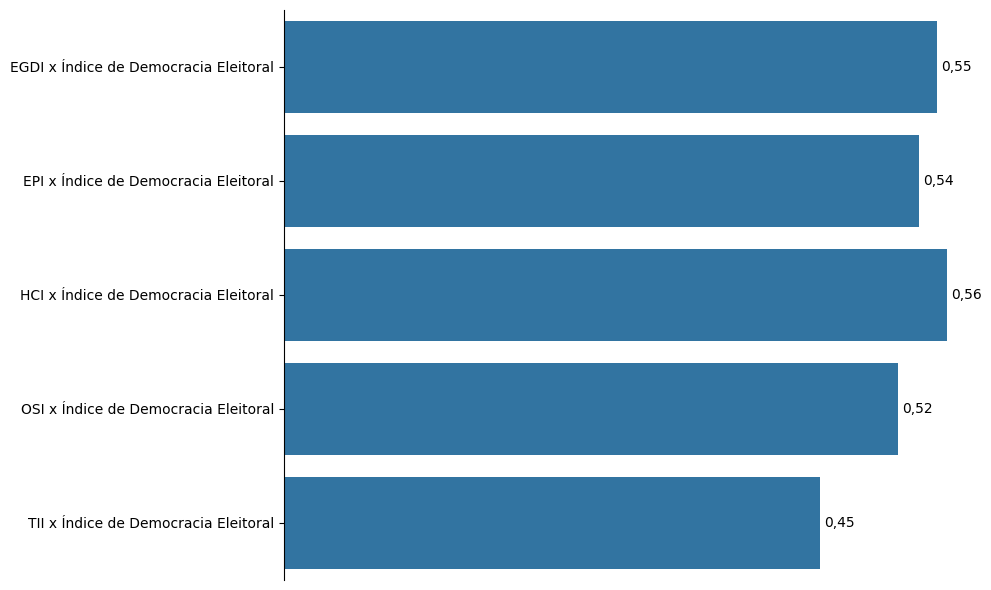

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_container = sns.barplot(corr_df, x='Coeficiente_Correlacao', y='Comparacao')

ax.bar_label(bar_container.containers[0], fmt=lambda x: f'{x:.2f}'.replace('.', ','), label_type='edge', padding=3)
sns.despine(bottom=True)
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_visible(False)
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/correlacao_egdi_indicedemocraciaeleitoral.png', dpi=300, bbox_inches='tight')
plt.show()